# Project: Medical Oppintments (Data Set Investigation)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This investigation is for analyzing "Medical appointments no-shows" data set and answer some questions regarding it. This dataset collects information from 100,000 medical appointments in Brazil. A number of characteristics about each patient are included in each row. 

> Note: In all columns other than age, 0 = false and 1 = true

> The aim of this analysis is to figure out what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
- Does age affect showing up?
- Does the presence of a disability (identified as handcap in the data set) affects patients showing up in a negative way?
- Does recieving SMS increase the chance of patients to show up on time for their oppointments?
- Does enrolling in Bolsa Familia (identified as scholarship in the data set) make patients show up on time for their oppointments?



In [1]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> loading data, checking for missing values and duplicates, triming and cleaning the dataset for analysis. 

### General Properties

In [2]:
# Loading data and viewing it
df = pd.read_csv('Medical_oppointments.csv')
df.head(10) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
#Renaming 
df.rename(columns = {"PatientId": "PatientID"}, inplace = True)
df.rename(columns = {"Hipertension": "Hypertension"}, inplace = True)
df.rename(columns = {"Handcap": "Handicapped"}, inplace = True)
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Inspecting data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicapped       110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Looking for missing data
df.isnull().sum()

PatientID         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicapped       0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#Looking for duplicates
sum(df.duplicated())

0

In [7]:
# Creat function to convert float or int to str
def float_to_str(x):
    return str(x)

In [8]:
#Correcting datatypes

df['PatientID']     = df['PatientID'].apply(lambda x: float_to_str(x) )
df['AppointmentID'] = df['AppointmentID'].apply(lambda x: float_to_str(x) )

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicapped       110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 11.8+ MB


In [9]:
#Renaming 'No show' to be easier for understanding
df.rename(columns = {"No-show": "Show"}, inplace = True)

#Adjusting values after renaming 
df['Show'].replace("Yes" , 0 , inplace = True)
df['Show'].replace("No" , 1 , inplace = True)

df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Show
0,29872500000000.0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558998000000000.0,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262960000000.0,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951000000.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841190000000.0,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [10]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [11]:
# Age min is -1, doesn't make sense
# inspecting patient
df[df['Age']< 0 ]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Show
99832,465943000000000.0,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1


In [12]:
#Dropping patient
df.drop(99832, inplace = True)
#Checking 
df[df['Age']< 0 ]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Show


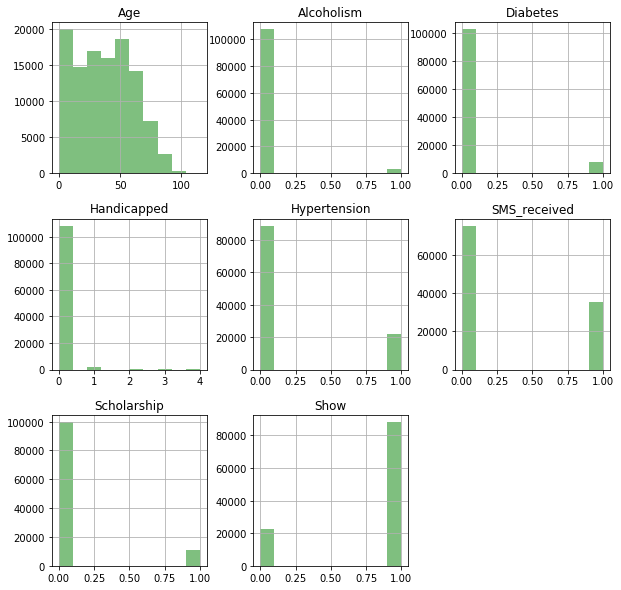

In [13]:
df.hist(figsize =(10,10), color = 'green', alpha = 0.5);

In [14]:
# Something odd in 'Handicapped' histogram 
# looking for numerical mistakes
df[df['Handicapped']>1].head(2)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,Show
946,72825800000000.0,5582483,M,2016-04-14 09:26:08,2016-04-29,94,BELA VISTA,0,1,1,0,2,1,1
1665,12429200000000.0,5525497,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,1,1


In [15]:
#Checking how many times 2, 3, 4 values were written to find whether they were in purpose to rank the level of disability or it is an error
df['Handicapped'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicapped, dtype: int64

In [16]:
# Mistake found
# Assuming it was supposed to be written as 1 
df.replace(to_replace =[2, 3, 4], value =1, inplace=True)


In [17]:
# Cheking
display(df.iloc[946])

PatientID            72825800000000.0
AppointmentID                 5582483
Gender                              M
ScheduledDay      2016-04-14 09:26:08
AppointmentDay    2016-04-29 00:00:00
Age                                94
Neighbourhood              BELA VISTA
Scholarship                         0
Hypertension                        1
Diabetes                            1
Alcoholism                          0
Handicapped                         1
SMS_received                        1
Show                                1
Name: 946, dtype: object

### The data is now clean.
> Misnaming, incorrect data type and extreme values were detected and adujsted, no missing data or duplicates were found.
- Renaming
- Changed 'scheduledday' and 'appointmentday' from strings to pandas datetime format.
- Changed 'PatientID' from integer to string
- To minimize confusion, I changed 'no-show' column name to 'show' and made the column's formatting binary like the other Yes/No columns. Where '1' indicates that the patient showed while '0' indicates that the patient didn't show.
- Spotted an extreme value in 'Age' column, row number 99832 and dropped it.
- Spotted odd display in 'Handcap' histogram, figured out whether it was on purpose or an error. Found to be an error, therefore replaced.

<a id='eda'></a>
## Exploratory Data Analysis

### Age and Appointment Commitment



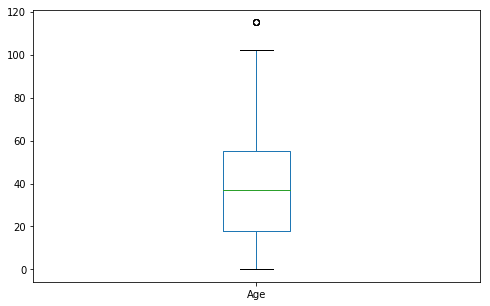

In [18]:
# Demonstrating the age
df['Age'].plot(kind='box', figsize=(8,5));

In [19]:
show = df.Show == True
no_show = df.Show == False

In [20]:
df.Age[show].mean()

37.712403777477981

In [21]:
df.Age[no_show].mean()

34.243648909001301

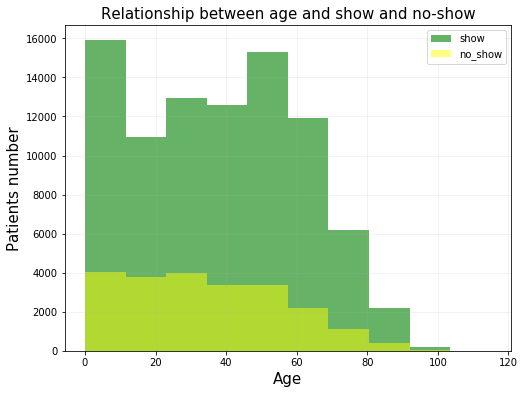

In [22]:
plt.figure(figsize = (8, 6));
df.Age[show].hist(alpha = 0.6, label='show', bins = 10, color = 'green');
df.Age[no_show].hist(alpha = 0.5, label='no_show', bins = 10, color = 'yellow');
plt.grid(alpha = 0.2);
plt.title('Relationship between age and show and no-show',fontsize=15);
plt.xlabel('Age', fontsize=15)
plt.ylabel('Patients number', fontsize=15);
plt.legend();

From this visualisation we can realise that:
- People in their mid- 20s and in their 80s tend to show less than other age groups.

### Being Handicapped and Appointment Commitment

In [23]:
handicapped = df.Handicapped == True
not_handicapped = df.Handicapped == False


In [24]:
df.Show[handicapped].mean()

0.81838464970995095

In [25]:
df.Show[not_handicapped].mean()

0.79764510319988913

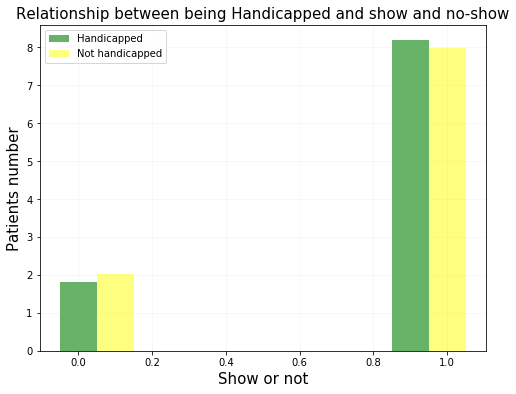

In [26]:
plt.figure(figsize = (8, 6));
df.Show[handicapped].hist(alpha = 0.6, label='Handicapped', bins = 10, color = 'green', density=True, align='left');
df.Show[not_handicapped].hist(alpha = 0.5, label='Not handicapped', bins = 10, color = 'yellow', density=True, align='right');
plt.grid(alpha = 0.1);
plt.title('Relationship between being Handicapped and show and no-show',fontsize=15);
plt.xlabel('Show or not', fontsize=15)
plt.ylabel('Patients number', fontsize=15);
plt.legend();


From this visualisation we can realise that:
- Handicapped patients tend to show less than non-handicapped.

### Recieving SMS and Appointment Commitment

In [27]:
sms = df.SMS_received == True
no_sms = df.SMS_received == False

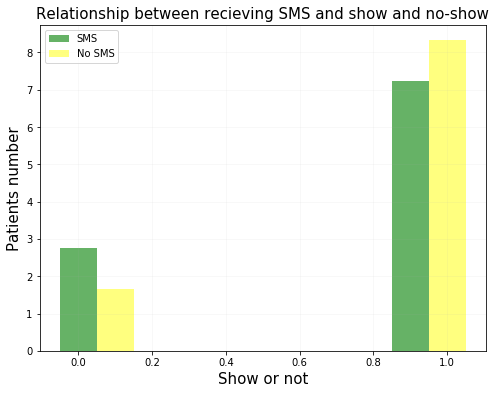

In [28]:
plt.figure(figsize = (8, 6));
df.Show[sms].hist(alpha = 0.6, label='SMS', bins = 10, color = 'green', density=True, align='left');
df.Show[no_sms].hist(alpha = 0.5, label='No SMS', bins = 10, color = 'yellow', density=True, align='right');
plt.grid(alpha = 0.1);
plt.title('Relationship between recieving SMS and show and no-show',fontsize=15);
plt.xlabel('Show or not', fontsize=15)
plt.ylabel('Patients number', fontsize=15);
plt.legend();

From this visualisation we can realise that:
- The bar on the left display the patients that didn't show, althoug 83% of them recieved an SMS.
- The bar on the right display the patients that showed, although less than 50% of them recieved an SMS.

### Welfare program Enrollment and Appointment Commitment

In [29]:
scholarship = df.Scholarship == True
no_scholarship = df.Scholarship == False

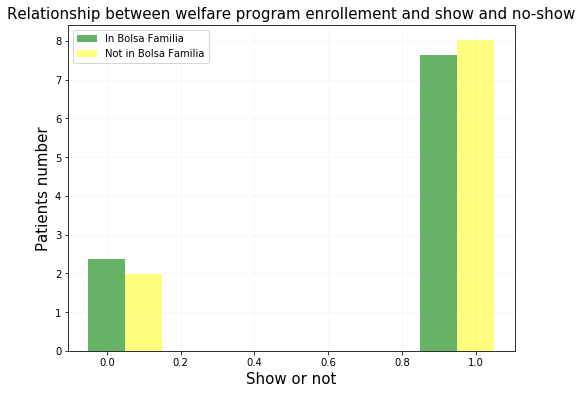

In [30]:
plt.figure(figsize = (8, 6));
df.Show[scholarship].hist(alpha = 0.6, label='In Bolsa Familia', bins = 10, color = 'green', density=True, align='left');
df.Show[no_scholarship].hist(alpha = 0.5, label='Not in Bolsa Familia', bins = 10, color = 'yellow', density=True, align='right');
plt.grid(alpha = 0.1);
plt.title('Relationship between welfare program enrollement and show and no-show',fontsize=15);
plt.xlabel('Show or not', fontsize=15)
plt.ylabel('Patients number', fontsize=15);
plt.legend();

From this visualisation we can realise that:
- 16.6% of the patients that didn't show up were enrolled in Bolsa Familia program
- 10 % of the patients that showed up were enrolled in Bolsa Familia program

<a id='conclusions'></a>
## Conclusions

##### Results: 
The data suggests that:
- People in their mid- 20s and in their 80s tend to show less than other age groups.
- Handicapped patients tend to show less than non-handicapped. 
- Recieving SMS didn't affect showing up in a positive way.
- Patients enrolled in Bolsa Familia program didn't show as much as the patient's who aren't enrolled

##### Limitations:
There are some limitations with the data:
- Most of the variables are categorical, which doesn't allow for a high level of statistical method that can be used to provide correlations.
- The statistics used here are descriptive statistics, not inferential, meaning that we didn't creat any hypotheses or controlled experiments or inferences with our data.
- There aren't a lot of details for certain factors to draw conclusions. For the SMS_received example, the data shows that "no-show" are more likely to recieve an SMS. This may seem counter intuitive, but we don't have information on the conditions of when the SMS is sent. For example, they may target "now-show" patients with SMS, or they may send the SMS once the patient has not checked in 30 minuted prior to their appointment.


In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0